In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
### Load the dataset
data = pd.read_csv("C:/Users/thogi/Downloads/heart_failure_clinical_records_dataset.csv")

In [4]:
##Number of samples 299
#Number of clinical features 12

numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium","time"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

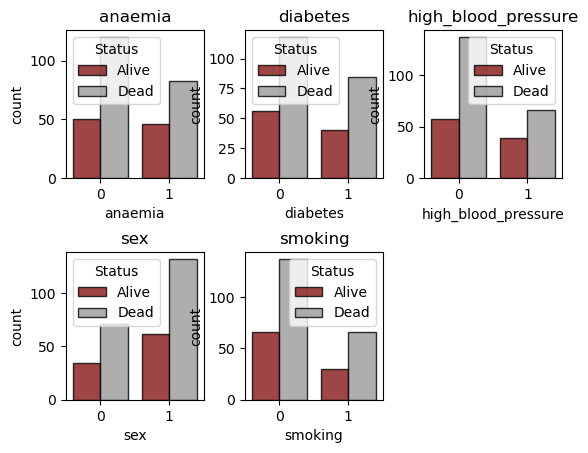

In [5]:
num_categorical_features = len(categorical_features)
num_rows = (num_categorical_features // 3) + 1
num_cols = min(num_categorical_features, 3)

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    # Map 'DEATH_EVENT' values to custom labels
    custom_labels = {0: 'Dead', 1: 'Alive'}

    sns.countplot(data=data, x=col, hue="DEATH_EVENT", palette=["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1, hue_order=[1, 0])

    # Customize the legend
    plt.legend(title="Status", labels=[custom_labels[1], custom_labels[0]])

plt.show()

In [6]:
###1.1. Apply K-Means clustering to the dataset using all features except 'DEATH_EVENT.'
data1 = data.drop(columns=['DEATH_EVENT'])

In [7]:
###1.2. Using Elbow method
optimal = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data1)
    optimal.append(kmeans.inertia_)

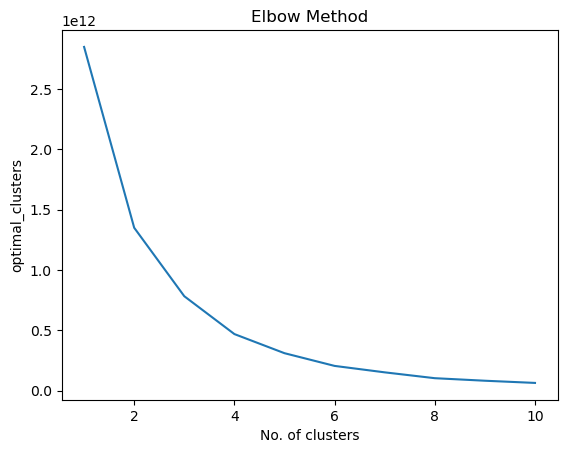

In [8]:
plt.plot(range(1, 11), optimal)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('optimal_clusters')
plt.show()


In [9]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

In [10]:
### assumption taking k is 11
k = 3

#1.2. Perform K-Means clustering with the chosen 'k' and Euclidean distance
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [11]:
# Visualize the clusters
# K-Means model to your data
kmeans.fit(data_scaled)

cluster_centers = kmeans.cluster_centers_

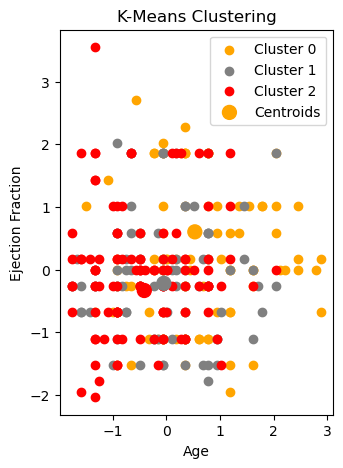

In [12]:
# Define custom colors for the clusters (orange, grey, and red)
custom_colors = ['orange', 'grey', 'red']

# Visualize the clustering results for each method.
plt.figure(figsize=(12, 5))

plt.subplot(131)
for i in range(k):
    plt.scatter(data_scaled[kmeans_labels == i, 0], data_scaled[kmeans_labels == i, 4], label=f'Cluster {i}', color=custom_colors[i])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c=custom_colors, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Age")
plt.ylabel("Ejection Fraction")
plt.legend()
plt.show()

In [13]:
###1.3 Perform Kernel K-Means clustering with the chosen 'k'
##tried both tslearn KernelKMeans & Kernel PCA
# Initialize KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=0.1)

In [14]:
# Fit and transform the data
data_kpca = kpca.fit_transform(data_scaled)
kernel_kmeans = KMeans(n_clusters=k, random_state=0)
kernel_kmeans_labels = kernel_kmeans.fit_predict(data_kpca)


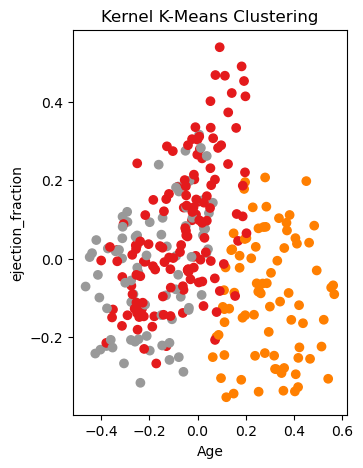

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(132)
plt.scatter(data_kpca[:, 0], data_kpca[:, 4], c=kernel_kmeans_labels, cmap="Set1")
plt.title("Kernel K-Means Clustering")
plt.xlabel("Age")
plt.ylabel("ejection_fraction")
plt.show()

In [18]:
### 1.4. Apply Expectation Maximization (EM) clustering.
gm = GaussianMixture(n_components=k, random_state=0)
gm.fit(data1)

GaussianMixture(n_components=3, random_state=0)

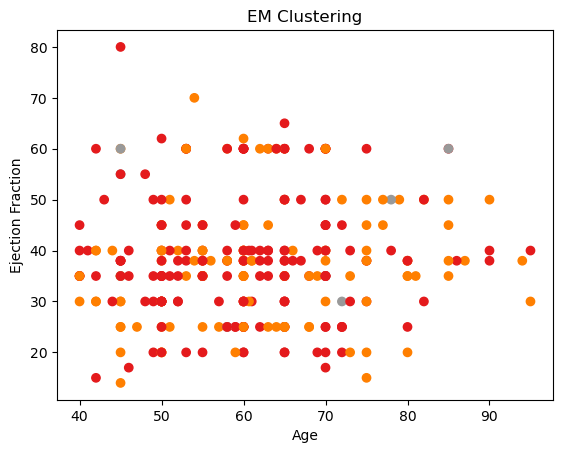

In [19]:
# Visualize the clusters
labels = gm.predict(data1)
plt.scatter(data1['age'], data1['ejection_fraction'], c=labels, cmap='Set1')
plt.title('EM Clustering')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

In [20]:
# Calculate the silhouette score for each clustering solution
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
silhouette_kernel_kmeans = silhouette_score(data_kpca, kernel_kmeans_labels)

In [21]:
# silhouette scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (Kernel K-Means): {silhouette_kernel_kmeans}")


Silhouette Score (K-Means): 0.10189795287252704
Silhouette Score (Kernel K-Means): 0.04950130788171829


In [22]:
###1.5 Compare and contrast clustering results
'''According to the above visualizations, we can observe:
Kmeans is widely used clustering technique for spherically and organized clusters.
Kernel Kmeans is used for data having non-linear relationships.
By Calculating Silhouette scores for Kmeans and Kernel Kmeans , we can analyse that kMeans has a higher score than KernelKmeans.
Hence Kmeans is more reliable for this data.'''

'According to the above visualizations, we can observe:\nKmeans is widely used clustering technique for spherically and organized clusters.\nKernel Kmeans is used for data having non-linear relationships.\nBy Calculating Silhouette scores for Kmeans and Kernel Kmeans , we can analyse that kMeans has a higher score than KernelKmeans.\nHence Kmeans is more reliable for this data.'

In [23]:
###1.6 Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT
'''In predicting (Death_Event) Kmeans clustering algorithm is more reliable as
we could calculate minimum distance from the centroids using euclidean distance or elbow method.
By this we could determine the appropriate K value for deriving optimal clusters'''

'In predicting (Death_Event) Kmeans clustering algorithm is more reliable as\nwe could calculate minimum distance from the centroids using euclidean distance or elbow method.\nBy this we could determine the appropriate K value for deriving optimal clusters'

In [24]:
#2.1 Split the data into features (X) and the target variable (y)
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']


In [25]:
# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#2.2. Create and train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# MSE--> Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [27]:
# Create and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)


In [28]:
#2.3. Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [29]:
##2.4. Error calculation in both Linear regression and Ridge regression
print("Linear Regression Mean Squared Error: ", mse_linear)
print("Ridge Regression Mean Squared Error: ", mse_ridge)


Linear Regression Mean Squared Error:  0.1802824115997144
Ridge Regression Mean Squared Error:  0.17979425982855204


In [30]:
###2.5. Discuss the strengths and weaknesses of the Linear and Ridge Regression models for mortality prediction.
'''Strengths of Linear Regression:

Simplicity: Linear Regression is direct and easy to understand.
It provides a simple linear relationship between input features and the target variable (DEATH_EVENT).

Understandable: The coefficients in a Linear Regression model are easy to observe. 
They tell us how each feature affects the death occurance.

Transparency: Linear Regression provides clear insights into which features contribute positively or negatively to the prediction.

Weaknesses of Linear Regression:

Linearity Assumption: Linear Regression assumes that the relationship between features and Death_event is linear. 
In reality that is not the case.

Underfitting: When the relationships are non-linear, Linear Regression may not capture intricate patterns in the data.

Strengths of Ridge Regression:

Regularization: Ridge Regression adds a regularization term to the linear regression model.
this can prevent overfitting.

Improved Generalization: In the presence of noise and highly correlated features Ridge Regression is more appropriate.

Weaknesses of Ridge Regression:

Complexity: Ridge Regression adds complexity to the model due to the regularization term.'''


'Strengths of Linear Regression:\n\nSimplicity: Linear Regression is direct and easy to understand.\nIt provides a simple linear relationship between input features and the target variable (DEATH_EVENT).\n\nUnderstandable: The coefficients in a Linear Regression model are easy to observe. \nThey tell us how each feature affects the death occurance.\n\nTransparency: Linear Regression provides clear insights into which features contribute positively or negatively to the prediction.\n\nWeaknesses of Linear Regression:\n\nLinearity Assumption: Linear Regression assumes that the relationship between features and Death_event is linear. \nIn reality that is not the case.\n\nUnderfitting: When the relationships are non-linear, Linear Regression may not capture intricate patterns in the data.\n\nStrengths of Ridge Regression:\n\nRegularization: Ridge Regression adds a regularization term to the linear regression model.\nthis can prevent overfitting.\n\nImproved Generalization: In the presence o

In [31]:
###3.1. Define a binary classification task to predict 'DEATH_EVENT.'
# In this step we predict whether a patient is at risk of a 
#'DEATH_EVENT' (1)--> dead or
# 'DEATH_EVENT'(0) --> alive based on the available clinical features.

In [32]:
### 3.2. Create and train a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the Naive Bayes classifier
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

In [33]:
#3.3. Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

In [34]:
#3.4. Evaluate the performance of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of Naive Bayes Classifier: ", accuracy_naive_bayes)
print("Accuracy of KNN Classifier: ", accuracy_knn)

# precision
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes)
# F1 score
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes)

print(f"Naive Bayes Precision: {naive_bayes_precision:.2f}")
print(f"Naive Bayes F1 Score: {naive_bayes_f1:.2f}")


Accuracy of Naive Bayes Classifier:  0.7666666666666667
Accuracy of KNN Classifier:  0.5777777777777777
Naive Bayes Precision: 0.86
Naive Bayes F1 Score: 0.64


In [35]:
#3.5. Suitability of Classification Technique
'''The Naive Bayes classification technique is the most appropriate one as it shows greater percentage of accuracy 
as well as higher Precision.'''

'The Naive Bayes classification technique is the most appropriate one as it shows greater percentage of accuracy \nas well as higher Precision.'

In [36]:
'''Conclusion: 
In the clustering techniques we find that kmeans provides more silhouette score hence more accuracy.
The regression model helps to split data into training and testing data.
The Linear regression gives 0.18 MSE whereas Ridge regression gives 0.17 MSE which is almost similar.
As this data has 0,1 values it is suitable to use binary classification technique such as a Naive Bayes classifier to predict
the effect of features on the target variable i.e. Death_Event.'''

'Conclusion: \nIn the clustering techniques we find that kmeans provides more silhouette score hence more accuracy.\nThe regression model helps to split data into training and testing data.\nThe Linear regression gives 0.18 MSE whereas Ridge regression gives 0.17 MSE which is almost similar.\nAs this data has 0,1 values it is suitable to use binary classification technique such as a Naive Bayes classifier to predict\nthe effect of features on the target variable i.e. Death_Event.'